In [1]:
#import pandas for load and processing CSV
import pandas as pd

In [2]:
#load csv filr from url
data=pd.io.parsers.read_csv('https://gist.githubusercontent.com/prmishra/0e42b7444729751f354f668687ae0f4c/raw/072e4757d4041f789f00b0943b6ffed607342f16/data.csv')

In [3]:
# Display first 5 fields of data
data.head()

,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


In [4]:
# Visualize dataset using Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# Get data in numpy array format [nsamples,n_features]
data_arr=np.zeros((len(data['V1']),2))
data_arr[:,0]=data['V1']
data_arr[:,1]=data['V2']
data_arr

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

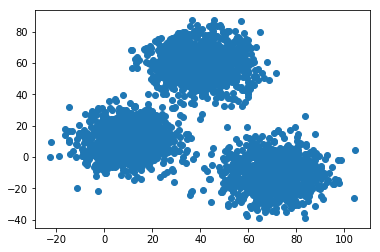

In [6]:
# Display a scatter plot
plt.scatter(data_arr[:,0],data_arr[:,1])

In [7]:
import math

def manhatten_dis(pt1,pt2):
    '''
    Returns manhatten distance i.e. |x1-x2| +|y1-y2|
    '''
    dis=0
    for i,j in zip(pt1,pt2):
        dis+=abs(i-j)
    return dis

def euclidian_dis(pt1,pt2):
    '''
    Returns euclidian distance
    '''
    dis=0
    for i,j in zip(pt1,pt2):
        dis+=abs(i-j)**2
    return math.sqrt(dis)

In [8]:
#Test above functions
manhatten_dis(data_arr[0],data_arr[1]),euclidian_dis(data_arr[0],data_arr[1])


(34.890868000000005, 24.772684417766158)

Iteration: 0


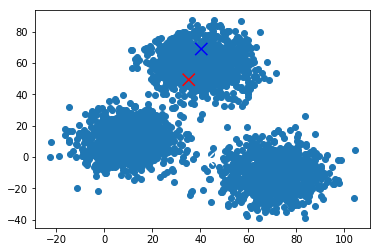

Iteration: 1


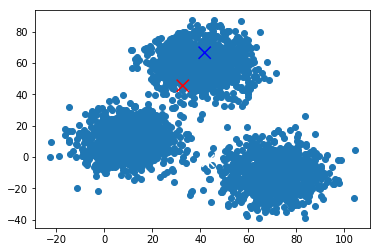

Iteration: 2


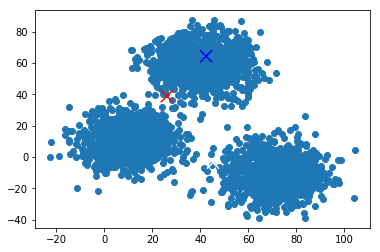

Iteration: 3


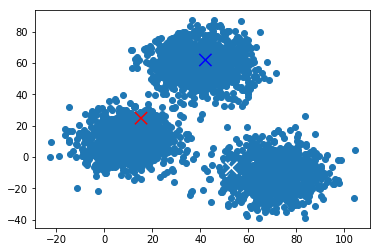

Iteration: 4


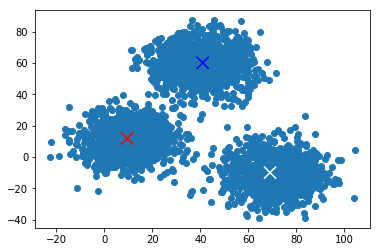

Iteration: 5


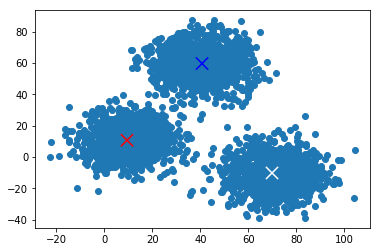

Iteration: 6


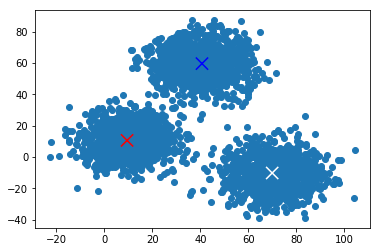

Iteration: 7


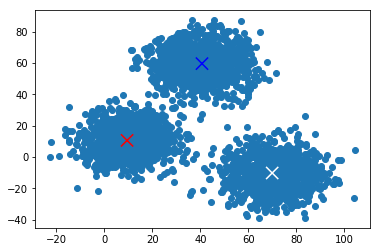

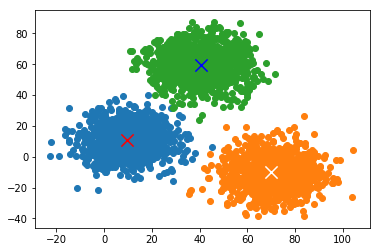

In [9]:
# use manhatten distance
# Select K random data-points as cluster centroids 
# return locations of cluster centroids

class K_means:
    '''
    A class for K means clustering:
    
    data_arr: array on which clustering is to be performed format=[num_samples,num_features]
    n_clusters: Number of clusters/centroids to be identified
    max_iters: Maximum iterations to be performed
    distance_metric: Type of distance metric to use 'manhatten'/'euclidian'
    
    '''
    def __init__(self,data_arr,n_clusters=3,max_iters=200,distance_metric='manhatten'):
        '''
        initializes parameters
        '''
        self.n_clusters=n_clusters
        self.max_iters=max_iters
        self.data_arr=data_arr
        self.num_samples=data_arr.shape[0]
        self.num_dims=data_arr.shape[1]
        if distance_metric=='manhatten':
            self.metric=manhatten_dis
        else:
            self.metric=euclidian_dis
        centroids=np.zeros((self.n_clusters,self.num_dims))
        
        # Initialize cluster locations with random datapoints
        for i in range(0,self.n_clusters):
            x=np.random.randint(0,self.num_samples)
            centroids[i]=self.data_arr[x]
        self.centroid_locs=centroids
        
        colornames=['b','g','r','c','m','w','y','k']
        self.colors=np.random.choice(colornames,size=self.n_clusters,replace=False)
        
    
    def iterate(self):
        '''
        Perform single iteration consisting of:
        1) Assigning points to a cluster
        2) shifting the centroid to mean of points
        '''
        # to store indexs of points in a cluster
        # Save memory by just using indexes only instead of storing points belonging to a centroid in a new array for each centroid
        cluster_list=[]
        for i in range(0,self.n_clusters):
            cluster_list.append([])
        
        # for each datapoint , calculate which is the closest centroid and 
        for idx,pt in enumerate(self.data_arr):
            cluster=self.nearest_centroid(pt)
            cluster_list[cluster].append(idx)
        
        #print(cluster_list)
        
        #then adjust the centroid according to mean of new points in that cluster
        centroid_update=0
        for i in range(0,self.n_clusters):
            sum_points=np.zeros((1,self.num_dims))
            point_counter=0
            for point_idx in cluster_list[i]:
                pt=self.data_arr[point_idx]
                #print(sum_points,pt)
                sum_points=np.array(sum_points)+np.array(pt)
                point_counter+=1
            
            new_centroid_loc=np.array(sum_points)/point_counter
            
            #print(sum_points,new_centroid_loc[0])
            #print(manhatten_dis(new_centroid_loc,self.centroid_locs[i]))
            #print(new_centroid_loc,self.centroid_locs[i])
            if self.metric(new_centroid_loc[0],self.centroid_locs[i]) > 0.05:
                centroid_update=1
            
            self.centroid_locs[i]=new_centroid_loc
        
        plt.scatter(data_arr[:,0],data_arr[:,1])
        plt.scatter(self.centroid_locs[:,0],self.centroid_locs[:,1],marker='x', s=150, linewidths = 5, zorder = 100, c=self.colors)
        plt.show()

        return centroid_update
    
    def nearest_centroid(self,pt):
        
        '''
        Returns the nearest centroid for a point  
        '''
        c=0
        min_dis=self.metric(pt,self.centroid_locs[0])
        
        for c_num in range(1,self.n_clusters):
            centroid=self.centroid_locs[c_num]
            dis=self.metric(pt,self.centroid_locs[c_num])
            if dis<min_dis:
                min_dis=dis
                c=c_num
        return c
    
    def find_clusters(self):
        '''
        returns final clusters centroids
        '''
        for i in range(0,self.max_iters):
            print("Iteration: "+str(i))
            change=self.iterate()
            # If centroids are not being updated: break
            if change==0:
                break
        return self.centroid_locs
    
    def predict_cluster(self,pt):
        '''
        predicts centroid for a point
        '''
        return nearest_centroid(pt)
    
    
    
    def final_visualization(self):
        
        '''
        Display final visualization of all the data
        '''
        cluster_list=[]

       
        for i in range(0,self.n_clusters):
            cluster_list.append([])

        # for each datapoint , calculate which is the closest centroid and 
        for pt in self.data_arr:
            cluster=self.nearest_centroid(pt)
            cluster_list[cluster].append(pt.tolist())
        
        
        for i in range(0,self.n_clusters):
            cluster_l=np.array(cluster_list[i])
            plt.scatter(cluster_l[:,0],cluster_l[:,1])
            plt.scatter(self.centroid_locs[i,0],self.centroid_locs[i,1],marker='x', s=150, linewidths = 5, zorder = 100, c=self.colors[i])
        
        plt.show()

        
# Perform K-Means clustering on the data
K=K_means(data_arr,3,200,'manhatten')
final_coordinates=K.find_clusters()
K.final_visualization()